In [2]:
!wget https://gitlab.com/rom1504/minecraft-schematics-dataset/-/raw/master/images/images11800.tfrecords

--2021-01-31 19:22:36--  https://gitlab.com/rom1504/minecraft-schematics-dataset/-/raw/master/images/images11800.tfrecords
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4210597 (4.0M) [application/octet-stream]
Saving to: ‘images11800.tfrecords’

images11800.tfrecor 100%[===================>]   4.01M  --.-KB/s    in 0.1s    

2021-01-31 19:22:37 (40.0 MB/s) - ‘images11800.tfrecords’ saved [4210597/4210597]



In [3]:
import tensorflow as tf
# Create a description of the features.
feature_description = {
    'url': tf.io.FixedLenFeature([], tf.string, default_value=''),
    'imageUrl': tf.io.FixedLenFeature([], tf.string, default_value=''),
    'imageData': tf.io.FixedLenFeature([], tf.string, default_value=''),
}

def _parse_function(example_proto):
  # Parse the input `tf.train.Example` proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, feature_description)

In [4]:
filenames = ["images11800.tfrecords"]
raw_dataset = tf.data.TFRecordDataset(filenames)
raw_dataset
parsed_dataset = raw_dataset.map(_parse_function)
parsed_dataset
def f(a, imageUrl, url):
    image = tf.image.decode_jpeg(a)
    return [image, imageUrl, url]

ds = parsed_dataset.map(lambda x: tf.py_function(f, [x['imageData'], x['imageUrl'], x['url']], [tf.uint8,tf.string,tf.string]))

tf.Tensor(b'https://static.planetminecraft.com/files/resource_media/screenshot/1338/2013-09-21_165856_6422785.jpg', shape=(), dtype=string)
tf.Tensor(b'https://www.planetminecraft.com/project/17-command-block-3x3-doors/', shape=(), dtype=string)
(224, 224, 3)


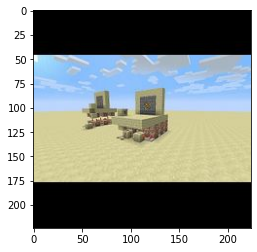

In [17]:
from matplotlib.pyplot import imshow
for imageData, imageUrl, url in ds.skip(10).take(1):
  print(imageUrl)
  print(url)
  print(imageData.shape)
  imshow(imageData.numpy())